# Peer-graded Assignment: Writing About Your Data

Instructions

It’s important to know how the data set you’re working with was generated, and how to describe your data management steps to others. This week’s assignment is to submit a blog entry in which you describe 1) your sample, 2) the data collection procedure, and 3) a measures section describing your variables and how you managed them to address your own research question. All of the data sets provided for the course have web sites that describe the study sample and the procedures used to collect the data. A simple Google search for the name of the study/data set will give you the link to the study web sites.

WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry and submit the URL. In your blog entry, you should describe your sample, the data collection procedure, and how you managed your data.
Review criteria

Your assessment will be based on the evidence you provide that you have completed all of the steps. When relevant, gradients in the scoring will be available to reward clarity (for example, you will get one point for submitting text that indicates an attempt to address the the criteria for each step, but two points for being clear). In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing. You will be assessed equally for each step of the assignment.


# Modeling and prediction for movies

## Step 1: 

Describe your sample. Provide enough detail so that your reader can clearly understand the population that the study sample came from. Use meaningful labels. Do not use abbreviations (“PPM100”) or variable names.

a) Describe the study population (who or what was studied).

b) Report the level of analysis studied (individual, group, or aggregate).

c) Report the number of observations in the data set.

d) Describe your data analytic sample (the sample you are using for your analyses).

This dataset is producted by Duke University's statistics department. An older reference can be found [here](http://www2.stat.duke.edu/~mc301/data/movies.html) but the dataset I retrieved is from Coursera and it has more entries (651 records).

According to the source:

    The data were said to be obtained from IMDB and Rotten Tomatoes. 

    It contains randomly sampled movies released between 1972 to 2014 in the Unites States. 

It provides individual level record (one movie per entry) with a total of 651.

If you read the "movies.describe()" cell, you can see several detailed descriptive statistics. From example, you can find out the range of release years by look at 'thtr_rel_year' column and locate min 1070 and max 2014.

In addition to movie's details (title, genre, runtime, release year, cast, etc), it has scores and ratings from critics and users as well as award winnings and box office performances.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf


%matplotlib inline

/Users/apple/anaconda3/envs/deep/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
movies = pd.read_feather('../../datasets/movies.feather')

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 32 columns):
title               651 non-null object
title_type          651 non-null category
genre               651 non-null category
runtime             650 non-null float64
mpaa_rating         651 non-null category
studio              643 non-null category
thtr_rel_year       651 non-null float64
thtr_rel_month      651 non-null float64
thtr_rel_day        651 non-null float64
dvd_rel_year        643 non-null float64
dvd_rel_month       643 non-null float64
dvd_rel_day         643 non-null float64
imdb_rating         651 non-null float64
imdb_num_votes      651 non-null int32
critics_rating      651 non-null category
critics_score       651 non-null float64
audience_rating     651 non-null category
audience_score      651 non-null float64
best_pic_nom        651 non-null category
best_pic_win        651 non-null category
best_actor_win      651 non-null category
best_actress_win    651 non-

In [12]:
movies.describe()

,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
count,650.000000,651.000000,651.000000,651.000000,643.000000,643.000000,643.000000,651.000000,651.000000,651.000000,651.000000
mean,105.821538,1997.941628,6.740399,14.416283,2004.427683,6.332815,15.007776,6.493088,57532.983103,57.688172,62.362519
std,19.445047,10.974501,3.554223,8.861167,4.643588,3.378228,8.867400,1.084747,112124.386910,28.402971,20.222624
min,39.000000,1970.000000,1.000000,1.000000,1991.000000,1.000000,1.000000,1.900000,180.000000,1.000000,11.000000
25%,92.000000,1990.000000,4.000000,7.000000,2001.000000,3.000000,7.000000,5.900000,4545.500000,33.000000,46.000000
50%,103.000000,2000.000000,7.000000,15.000000,2004.000000,6.000000,15.000000,6.600000,15116.000000,61.000000,65.000000
75%,115.750000,2007.000000,10.000000,21.000000,2008.000000,9.000000,23.000000,7.300000,58300.500000,83.000000,80.000000
max,267.000000,2014.000000,12.000000,31.000000,2015.000000,12.000000,31.000000,9.000000,893008.000000,100.000000,97.000000


In [14]:
# movies.thtr_rel_year.value_counts().sort_index()

In [19]:
movies.head(3).T

,0,1,2
title,Filly Brown,The Dish,Waiting for Guffman
title_type,Feature Film,Feature Film,Feature Film
genre,Drama,Drama,Comedy
runtime,80,101,84
mpaa_rating,R,PG-13,R
studio,Indomina Media Inc.,Warner Bros. Pictures,Sony Pictures Classics
thtr_rel_year,2013,2001,1996
thtr_rel_month,4,3,8
thtr_rel_day,19,14,21
dvd_rel_year,2013,2001,2001


In [15]:
movies.columns

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio',
       'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year',
       'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes',
       'critics_rating', 'critics_score', 'audience_rating', 'audience_score',
       'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win',
       'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3',
       'actor4', 'actor5', 'imdb_url', 'rt_url'],
      dtype='object')

## Step 2: Describe the procedures that were used to collect the data.

a) Report the study design that generated that data (for example: data reporting, surveys, observation, experiment).

b) Describe the original purpose of the data collection.

c) Describe how the data were collected.

d) Report when the data were collected.

e) Report where the data were collected.

The data was generated by user reporting on IMDB and Rotten Tomatoes. This data set was collected for students to practise their linear regression analytic skills in a statistics class. Similarly datasets can be found on Kaggle.

There is no relevation of how the data was collected but it is common knowledge that users provide the majority, if not all, of information on IMBD and Rotten Tomatoes. I assume the teacher in Duke University then either scrape the websites, got them from the website owners or downloaded them from a secondary source.

Judging from the date related records in the data set, we can infer the data was collected after 2014 from IMDB and Rotten Tomatoes.




## Step 3: Describe your variables.

### a) Describe what your explanatory and response variables measured.


The variables measured depending on the questions I ask and my initial assessment of the relationship. The explanatory variables given here are just me casting a big nest in the hope to catch some good results.

At this early stage, I will propose:

Predicte which movie is in top200_box

    Response: top200_box
    Explanatory: 
        'imdb_rating'
        'imdb_num_votes'
        'critics_rating'
        'critics_score'
        'audience_rating'
        'audience_score'
        'best_pic_win'
        'best_actor_win'
        'best_actress_win',
        'best_dir_win'

## b) Describe the response scales for your explanatory and response variables.

Using "movies.describe()", we can see the range of each variables if it's numeric. As for wins, it is a "yes' or "no". For my response variable, it's a binary data (yes or no) to represent if it is in the top 200 box office.

## c) Describe how you managed your explanatory and response variables.

I have to convert data into numeric if numeric data is imported as objects. Depending on what type analysis I am conducting, I may have to map discrete values (integers) to categorical data.

I also need to check the missing data and unusual data before starting analysis. I probably will use visualization tools to help me understand and manage the data.


In [20]:
movies['top200_box'].value_counts()

no     636
yes     15
Name: top200_box, dtype: int64

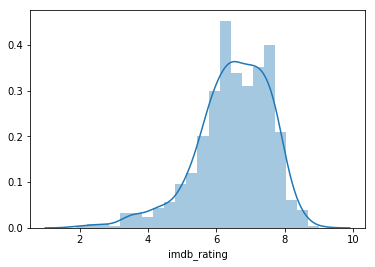

In [23]:
sns.distplot(movies['imdb_rating'])

## Codebook for Movies dataset

Provided by: Duke University's Statistics with R team on Coursera

Data

The data set is comprised of 651 randomly sampled movies produced and released before 2016.

Some of these variables are only there for informational purposes and do not make any sense to include in a statistical analysis. It is up to you to decide which variables are meaningful and which should be omitted. For example information in the the actor1 through actor5 variables was used to determine whether the movie casts an actor or actress who won a best actor or actress Oscar.

You might also choose to omit certain observations or restructure some of the variables to make them suitable for answering your research questions.

When you are fitting a model you should also be careful about collinearity, as some of these variables may be dependent on each other.
Codebook

    title: Title of movie
    title_type: Type of movie (Documentary, Feature Film, TV Movie)
    genre: Genre of movie (Action & Adventure, Comedy, Documentary, Drama, Horror, Mystery & Suspense, Other)
    runtime: Runtime of movie (in minutes)
    mpaa_rating: MPAA rating of the movie (G, PG, PG-13, R, Unrated)
    studio: Studio that produced the movie
    thtr_rel_year: Year the movie is released in theaters
    thtr_rel_month: Month the movie is released in theaters
    thtr_rel_day: Day of the month the movie is released in theaters
    dvd_rel_year: Year the movie is released on DVD
    dvd_rel_month: Month the movie is released on DVD
    dvd_rel_day: Day of the month the movie is released on DVD
    imdb_rating: Rating on IMDB
    imdb_num_votes: Number of votes on IMDB
    critics_rating: Categorical variable for critics rating on Rotten Tomatoes (Certified Fresh, Fresh, Rotten)
    critics_score: Critics score on Rotten Tomatoes
    audience_rating: Categorical variable for audience rating on Rotten Tomatoes (Spilled, Upright)
    audience_score: Audience score on Rotten Tomatoes
    best_pic_nom: Whether or not the movie was nominated for a best picture Oscar (no, yes)
    best_pic_win: Whether or not the movie won a best picture Oscar (no, yes)
    best_actor_win: Whether or not one of the main actors in the movie ever won an Oscar (no, yes) – note that this is not necessarily whether the actor won an Oscar for their role in the given movie
    best_actress win: Whether or not one of the main actresses in the movie ever won an Oscar (no, yes) – not that this is not necessarily whether the actresses won an Oscar for their role in the given movie
    best_dir_win: Whether or not the director of the movie ever won an Oscar (no, yes) – not that this is not necessarily whether the director won an Oscar for the given movie
    top200_box: Whether or not the movie is in the Top 200 Box Office list on BoxOfficeMojo (no, yes)
    director: Director of the movie
    actor1: First main actor/actress in the abridged cast of the movie
    actor2: Second main actor/actress in the abridged cast of the movie
    actor3: Third main actor/actress in the abridged cast of the movie
    actor4: Fourth main actor/actress in the abridged cast of the movie
    actor5: Fifth main actor/actress in the abridged cast of the movie
    imdb_url: Link to IMDB page for the movie
    rt_url: Link to Rotten Tomatoes page for the movie

